*Library*

In [3]:
!pip install shapely
!pip install fiona
!pip install pyproj
!pip install rtree
!pip install geopandas
!pip install geoplot

     |████████████████████████████████| 15.3MB 266kB/s 
     |████████████████████████████████| 6.6MB 6.0MB/s 
     |████████████████████████████████| 1.0MB 5.1MB/s 
     |████████████████████████████████| 1.0MB 6.5MB/s 
     |████████████████████████████████| 12.1MB 7.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 37.4MB/s 
     |████████████████████████████████| 19.1MB 239kB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516155 sha256=9ea7599ea89b1c429a85cd8eba9f5939d6587dd4628075fa4f3e55d9ab693862
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=99232ab6b95705d5e3725fb24fc75c8adf2d2555abbf09675e301f674a3b1ba1
  Stored in directory: /root/

In [4]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then to load a shapefile and view a portion of it:

In [11]:
idn = gpd.read_file('drive/My Drive/Colab Notebooks/INDONESIA_PROP.shp')
idn.head()

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."


dataset kasus covid didapat dari kaggle

https://www.kaggle.com/riqulaziz/case-vaccination-covid19-indonesia-dataset

In [12]:
df_cov = pd.read_csv('drive/My Drive/Colab Notebooks/Indonesia_coronavirus_daily_data.csv')
df_cov

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,01/03/2020,DKI JAKARTA,2,0,0,2,2,0,0,2
1,02/03/2020,DKI JAKARTA,2,0,0,2,4,0,0,4
2,03/03/2020,DKI JAKARTA,2,0,0,2,6,0,0,6
3,04/03/2020,DKI JAKARTA,2,0,0,2,8,0,0,8
4,05/03/2020,DKI JAKARTA,0,1,0,-1,8,0,1,7
...,...,...,...,...,...,...,...,...,...,...
14323,10/05/2021,NUSA TENGGARA TIMUR,60,0,68,-8,15362,13364,395,1603
14324,11/05/2021,NUSA TENGGARA TIMUR,125,1,167,-43,15487,13531,396,1560
14325,12/05/2021,NUSA TENGGARA TIMUR,9,1,1,7,15496,13532,397,1567
14326,13/05/2021,NUSA TENGGARA TIMUR,4,6,49,-51,15500,13581,403,1516


In [13]:
#memunculkan data yg dicari 1 Mei ditandain dengan True
datacari = df_cov["Date"]=="01/05/2021"
datacari

0        False
1        False
2        False
3        False
4        False
         ...  
14323    False
14324    False
14325    False
14326    False
14327    False
Name: Date, Length: 14328, dtype: bool

In [15]:
#menampilkan data yang dicari 1 Mei 2021
df_cari = df_cov[datacari]
#df_cari = df_sort.reset_index(drop=True)
df_cari

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
426,01/05/2021,DKI JAKARTA,926,15,793,118,409508,395620,6661,7227
865,01/05/2021,JAWA BARAT,754,5,760,-11,281959,247738,3746,30475
1358,01/05/2021,JAWA TIMUR,231,21,202,8,147976,135070,10679,2227
1788,01/05/2021,JAWA TENGAH,198,20,238,-60,184441,165923,8218,10300
2210,01/05/2021,SULAWESI SELATAN,25,0,16,9,61520,60275,934,311
2645,01/05/2021,BANTEN,53,0,28,25,47396,44129,1205,2062
3055,01/05/2021,NUSA TENGGARA BARAT,18,0,35,-17,10459,7873,388,2198
3485,01/05/2021,BALI,142,11,160,-29,44810,41882,1225,1703
3904,01/05/2021,PAPUA,0,0,10,-10,20365,11325,207,8833
4313,01/05/2021,KALIMANTAN SELATAN,88,4,99,-15,33046,29939,945,2162


In [16]:
idn

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."
5,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ..."
6,7,36,PROBANTEN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.72134 -6.09000 0.00000, ..."
7,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((110.89835 -8.17206 0.00000, ..."
8,9,81,MALUKU UTARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((127.74207 0.81629 0.00000, 1..."
9,10,82,MALUKU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((130.83130 -3.47141 0.00000, ..."


Dikarenakan nama propinsi di data peta dan province di dataset civid berbeda, sehingga perlu disamakan

In [17]:
idn['Propinsi'] = idn['Propinsi'].replace('PROBANTEN','BANTEN')
idn['Propinsi'] = idn['Propinsi'].replace('NUSATENGGARA BARAT','NUSA TENGGARA BARAT')
idn['Propinsi'] = idn['Propinsi'].replace('IRIAN JAYA BARAT','PAPUA BARAT')
idn['Propinsi'] = idn['Propinsi'].replace('BANGKA BELITUNG','KEPULAUAN BANGKA BELITUNG')
idn['Propinsi'] = idn['Propinsi'].replace('DI. ACEH','ACEH')

In [18]:
#Setelah menemukan data cari 1 mei dan setelah menyocokkan gemotri propinsi dan province, lalu menjadikan satu data
dataset_cari = idn.merge(df_cari, left_on="Propinsi", right_on="Province")
dataset_cari

,ID,kode,Propinsi,SUMBER,geometry,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2,52,NUSA TENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ...",01/05/2021,NUSA TENGGARA BARAT,18,0,35,-17,10459,7873,388,2198
1,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1...",01/05/2021,GORONTALO,6,4,49,-47,5400,5080,165,155
2,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ...",01/05/2021,SULAWESI TENGGARA,7,1,1,5,10427,9885,210,332
3,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01...",01/05/2021,DAERAH ISTIMEWA YOGYAKARTA,128,4,330,-206,39644,34735,960,3949
4,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ...",01/05/2021,JAWA TENGAH,198,20,238,-60,184441,165923,8218,10300
5,7,36,BANTEN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.72134 -6.09000 0.00000, ...",01/05/2021,BANTEN,53,0,28,25,47396,44129,1205,2062
6,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((110.89835 -8.17206 0.00000, ...",01/05/2021,JAWA TIMUR,231,21,202,8,147976,135070,10679,2227
7,9,81,MALUKU UTARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((127.74207 0.81629 0.00000, 1...",01/05/2021,MALUKU UTARA,0,0,0,0,4417,4147,120,150
8,10,82,MALUKU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((130.83130 -3.47141 0.00000, ...",01/05/2021,MALUKU,0,0,3,-3,7530,7130,117,283
9,11,63,KALIMANTAN SELATAN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((114.34601 -3.35271 0.00000, ...",01/05/2021,KALIMANTAN SELATAN,88,4,99,-15,33046,29939,945,2162


Text(0.5, 1.0, 'Daily Case COVID-19 Tanggal 01 Mei 2021')

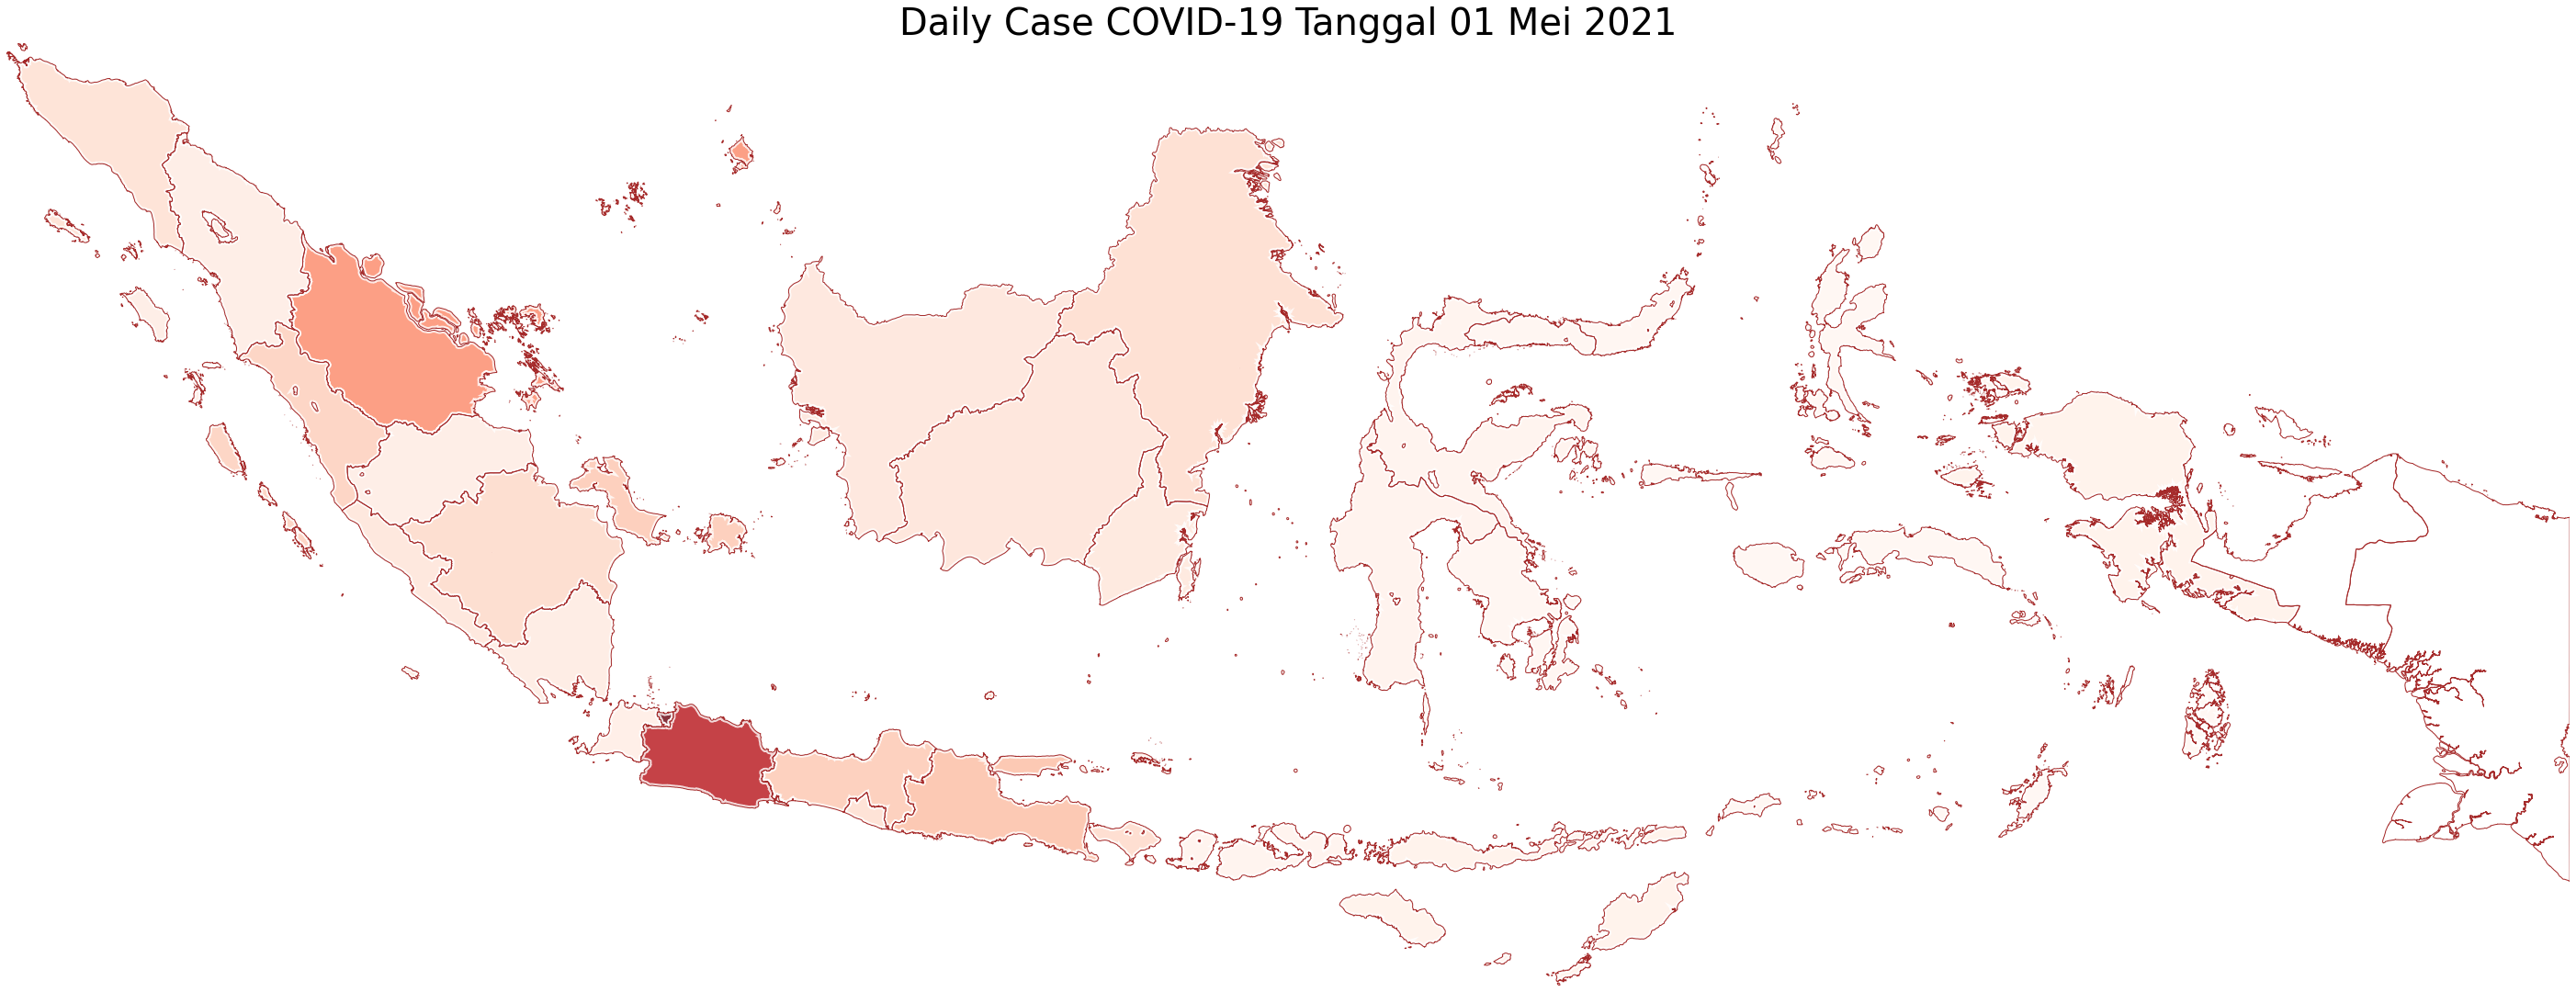

In [19]:
#Visualisasi untuk Daily Case
ax = gplt.choropleth(
    dataset_cari,
    hue="Daily_Case",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha = 0.8,
    figsize=(50, 50)
)

gplt.polyplot(
    idn,
    ax=ax,
    extent=idn.total_bounds,
    edgecolor="brown",
    linewidth=1,
    zorder=1,
)
ax.set_title(
    "Daily Case COVID-19 Tanggal 01 Mei 2021",
    fontsize=40
)

Text(0.5, 1.0, 'Daily Death COVID-19 Tanggal 01 Mei 2021')

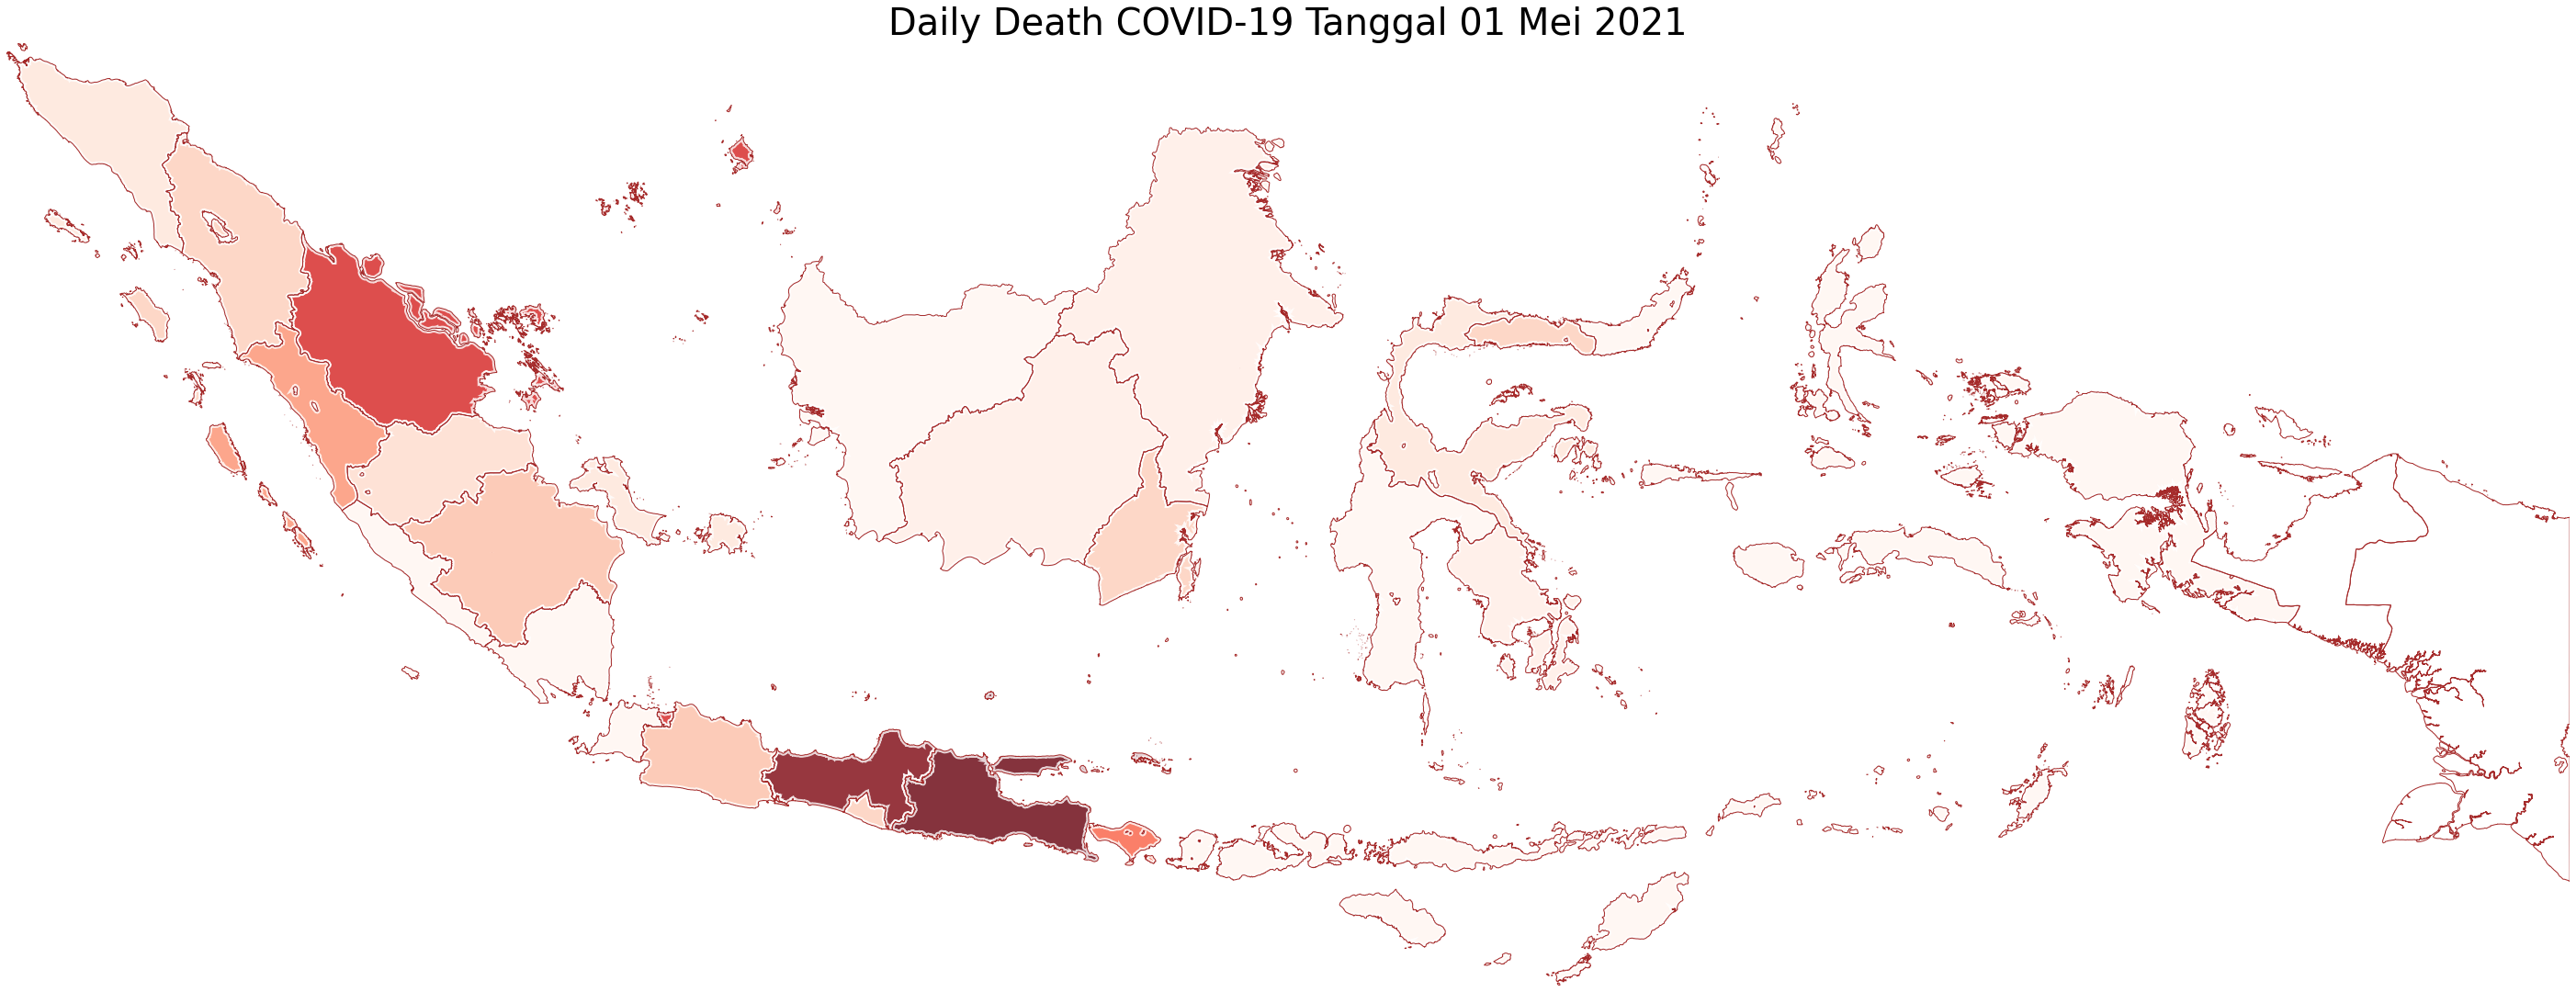

In [20]:
#Visualisasi untuk Daily Death
ax = gplt.choropleth(
    dataset_cari,
    hue="Daily_Death",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha = 0.8,
    figsize=(50, 50)
)

gplt.polyplot(
    idn,
    ax=ax,
    extent=idn.total_bounds,
    edgecolor="brown",
    linewidth=1,
    zorder=1,
)
ax.set_title(
    "Daily Death COVID-19 Tanggal 01 Mei 2021",
    fontsize=40
)

Text(0.5, 1.0, 'Daily Recovered COVID-19 Tanggal 01 Mei 2021')

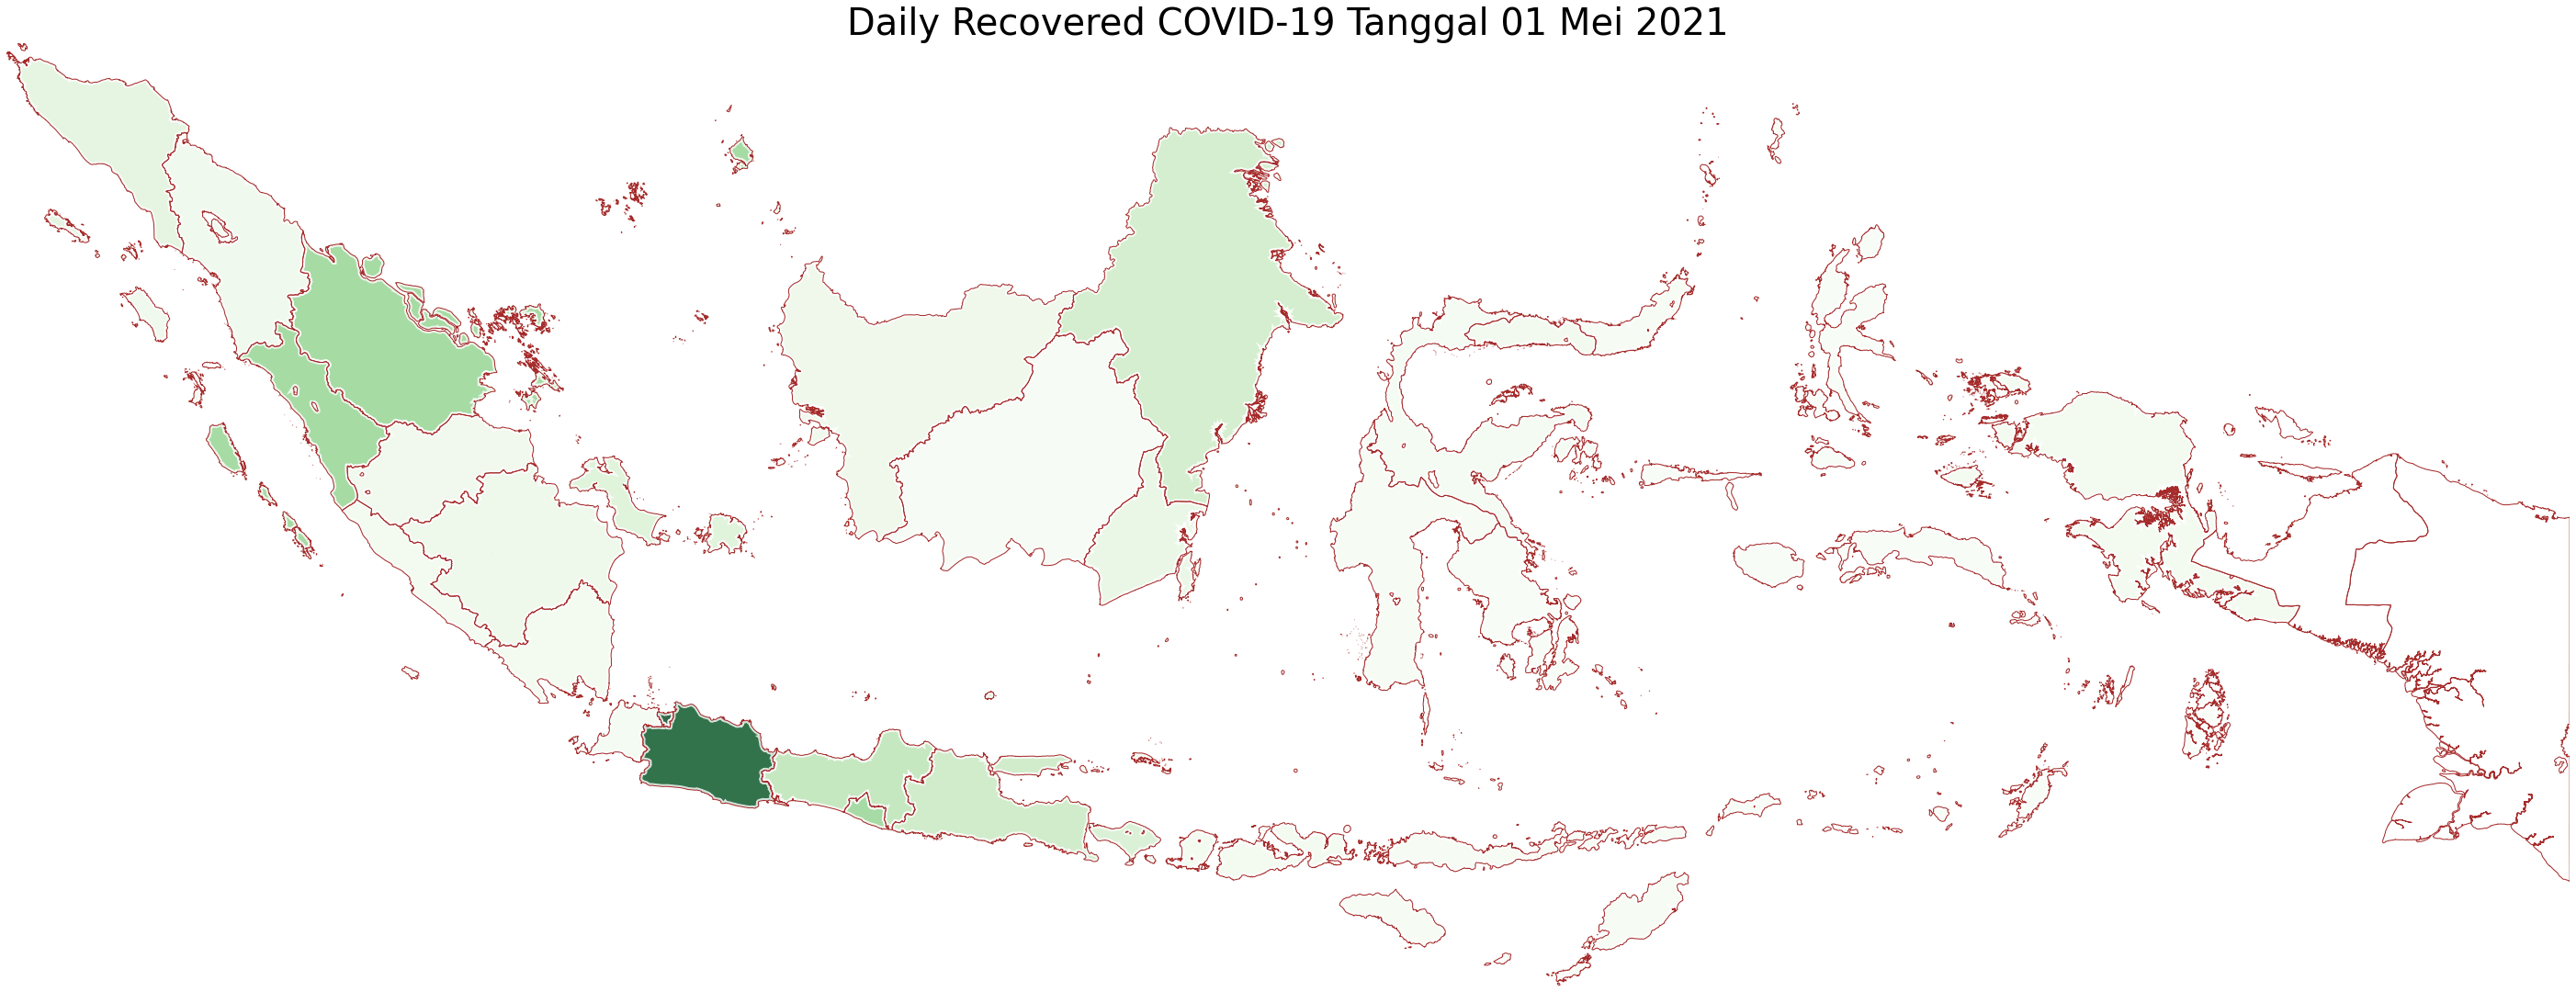

In [21]:
#Visualisasi untuk Daily Recovered
ax = gplt.choropleth(
    dataset_cari,
    hue="Daily_Recovered",
    edgecolor="white",
    linewidth=5,
    cmap="Greens",
    alpha = 0.8,
    figsize=(50, 50)
)

gplt.polyplot(
    idn,
    ax=ax,
    extent=idn.total_bounds,
    edgecolor="brown",
    linewidth=1,
    zorder=1,
)
ax.set_title(
    "Daily Recovered COVID-19 Tanggal 01 Mei 2021",
    fontsize=40
)